<h1><center>POINT OF SALES (POS) PAYMENT ANALYSIS</center></h1>

<h2><center>Table of Content</center></h2>

- [1. Libraries and Constants](#1)
- [2. Getting the Tables](#2)
- [3. Analyzing POS_CASH_balance.csv Table](#3)
    - [3.1 Table Information](#3.1)
    - [3.2 Missing Values](#3.2)
    - [3.3 Univariate Analysis](#3.3)
        - [3.3.1 Analyzing the SK_ID_PREV Variable](#3.3.1)
        - [3.3.2 Analyzing the SK_ID_CURR Variable](#3.3.2)
        - [3.3.3 Analyzing the MONTHS_BALANCE Variable](#3.3.3)
        - [3.3.4 Analyzing the CNT_INSTALMENT Variable](#3.3.4)
        - [3.3.5 Analyzing the CNT_INSTALMENT_FUTURE Variable](#3.3.5)
        - [3.3.6 Analyzing the NAME_CONTRACT_STATUS Variable](#3.3.6)
        - [3.3.7 Analyzing the SK_DPD Variable](#3.3.7)
        - [3.3.8 Analyzing the SK_DPD_DEF Variable](#3.3.8)
    - [3.4 Multivariate Analysis](#3.4)
- [4. Getting the Resultant Feature Space](#4)
    - [4.1 Saving the Feature Space](#4.1)

<h2><div id="1">1 : Libraries and Constants</div></h2>

In [1]:
import os

In [2]:
# Going two folders back from the CWD i.e. EDA:

os.chdir("..")
os.chdir("..")

In [3]:
# Now we are in the actual root directory of the project:

ROOT_DIR = os.getcwd()
ROOT_DIR

'C:\\Users\\KIIT\\Desktop\\Home Credit Default Risk'

In [4]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import src.eda.visualization as plotter
import src.eda.tabular as tab
import src.fe.pos_cash as pos_fe

In [6]:
warnings.filterwarnings("ignore")

<h2><div id="2">2 : Getting the Tables</div></h2>

In [7]:
pos_cash = pd.read_csv(
    os.path.join(ROOT_DIR,"data","original","POS_CASH_balance.csv")
)
pos_cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


<h2><div id="3">3 : Analyzing POS_CASH_balance.csv File</div></h2>

<h3><div id="3.1">3.1 : Table Information</div></h3>

In [8]:
pos_cash.shape

(10001358, 8)

In [9]:
pos_cash.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [10]:
pos_cash.dtypes

SK_ID_PREV                 int64
SK_ID_CURR                 int64
MONTHS_BALANCE             int64
CNT_INSTALMENT           float64
CNT_INSTALMENT_FUTURE    float64
NAME_CONTRACT_STATUS      object
SK_DPD                     int64
SK_DPD_DEF                 int64
dtype: object

<h3><div id="3.2">3.2 : Missing Values</div></h3>

In [11]:
tab.get_missing_values(pos_cash)

,Column,Missing Values,Missing Values by %
0,SK_ID_PREV,0,0.000
1,SK_ID_CURR,0,0.000
2,MONTHS_BALANCE,0,0.000
3,CNT_INSTALMENT,26071,0.261
4,CNT_INSTALMENT_FUTURE,26087,0.261
5,NAME_CONTRACT_STATUS,0,0.000
6,SK_DPD,0,0.000
7,SK_DPD_DEF,0,0.000


<h3><div id="3.3">3.3 : Analyzing the Variables</div></h3>

<h4><div>3.3.1 : Analyzing SK_ID_PREV Variable</div></h4>

In [12]:
len(list(pos_cash["SK_ID_PREV"].unique()))

936325

<h4><div id="3.3.2">3.3.2 : Analyzing SK_ID_CURR Variable</div></h4>

In [13]:
len(list(pos_cash["SK_ID_CURR"].unique()))

337252

<h4><div id="3.3.3">3.3.3 : Analyzing MONTHS_BALANCE Variable</div></h4>

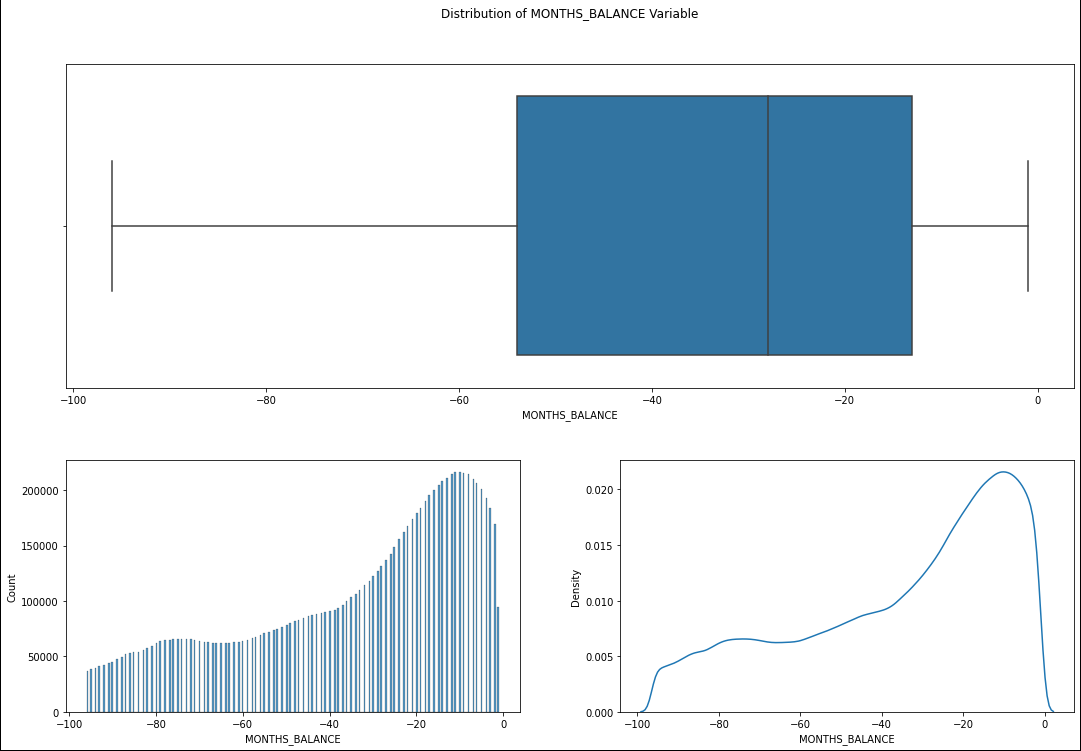

In [14]:
plotter.numeric_distribution(
    title = "Distribution of MONTHS_BALANCE Variable",
    data = pos_cash,
    num_col = "MONTHS_BALANCE"
)

<h4><div id="3.3.4">3.3.4 : Analyzing CNT_INSTALMENT Variable</div></h4>

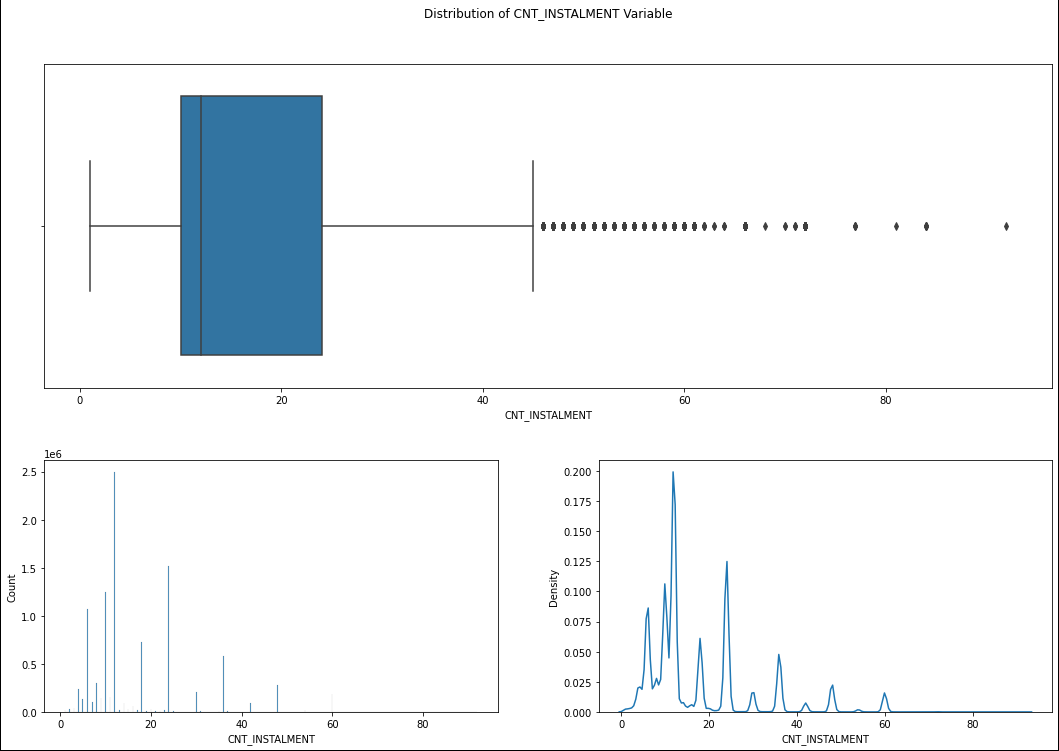

In [15]:
plotter.numeric_distribution(
    title = "Distribution of CNT_INSTALMENT Variable",
    data = pos_cash,
    num_col = "CNT_INSTALMENT"
)

<h4><div id="3.3.5">3.3.5 : Analyzing CNT_INSTALMENT_FUTURE Variable</div></h4>

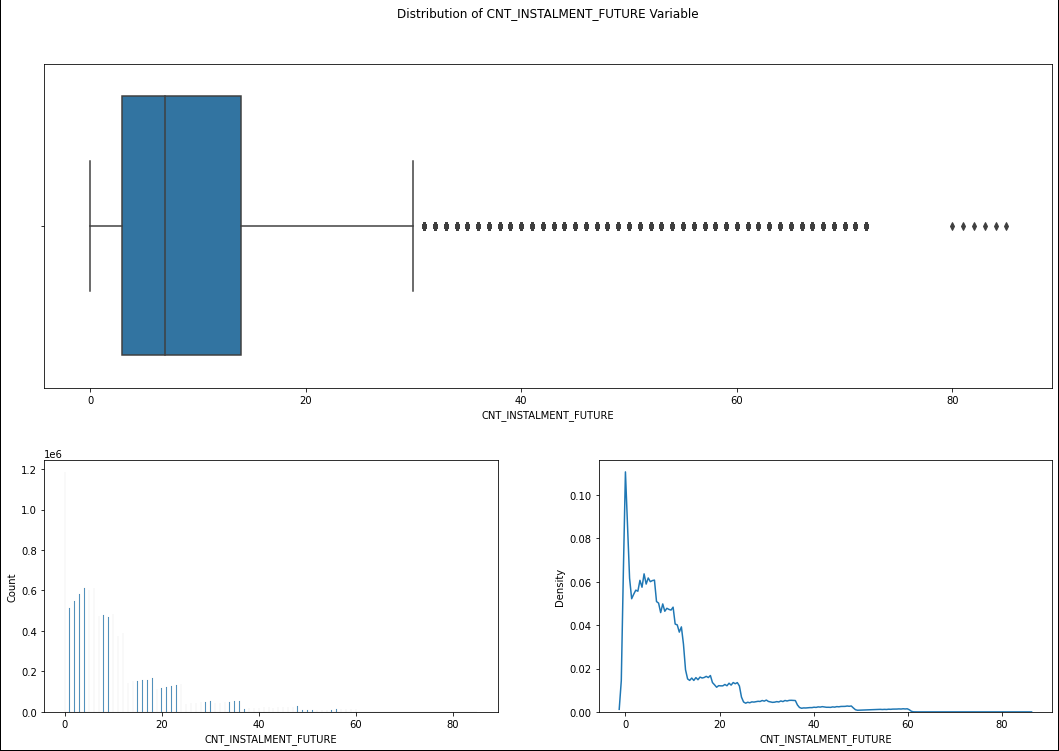

In [16]:
plotter.numeric_distribution(
    title = "Distribution of CNT_INSTALMENT_FUTURE Variable",
    data = pos_cash,
    num_col = "CNT_INSTALMENT_FUTURE"
)

<h4><div id="3.3.6">3.3.6 : Analyzing NAME_CONTRACT_STATUS Variable</div></h4>

In [17]:
pos_cash["NAME_CONTRACT_STATUS"].value_counts()

NAME_CONTRACT_STATUS
Active                   9151119
Completed                 744883
Signed                     87260
Demand                      7065
Returned to the store       5461
Approved                    4917
Amortized debt               636
Canceled                      15
XNA                            2
Name: count, dtype: int64

In [18]:
xna = pos_cash[pos_cash["NAME_CONTRACT_STATUS"]=="XNA"]
xna

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
1614508,1378042,142208,-21,NaN,NaN,XNA,0,0
1614509,1711630,309000,-24,NaN,NaN,XNA,0,0


In [19]:
pos_cash.drop(xna.index, inplace=True, axis=0)

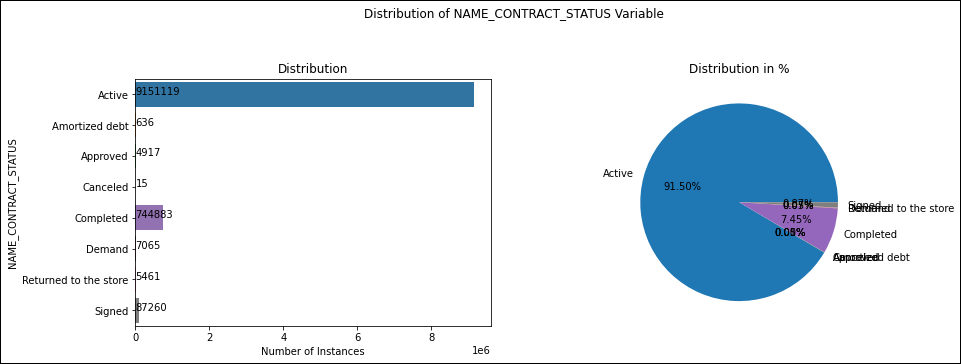

In [20]:
plotter.categorical_distribution(
    title = "Distribution of NAME_CONTRACT_STATUS Variable",
    series = pos_cash["NAME_CONTRACT_STATUS"]
)

<h4><div id="3.3.7">3.3.7 : Analyzing SK_DPD Variable</div></h4>

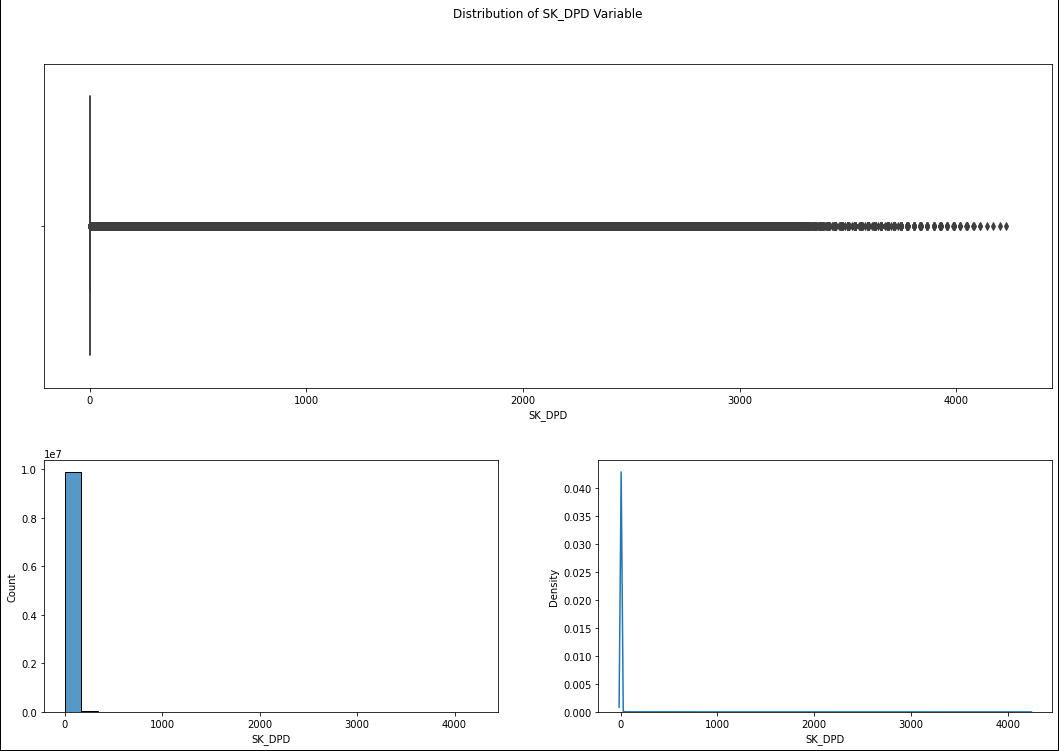

In [21]:
plotter.numeric_distribution(
    title = "Distribution of SK_DPD Variable",
    data = pos_cash,
    num_col = "SK_DPD"
)

<h4><div id="3.3.8">3.3.8 : Analyzing SK_DPD_DEF Variable</div></h4>

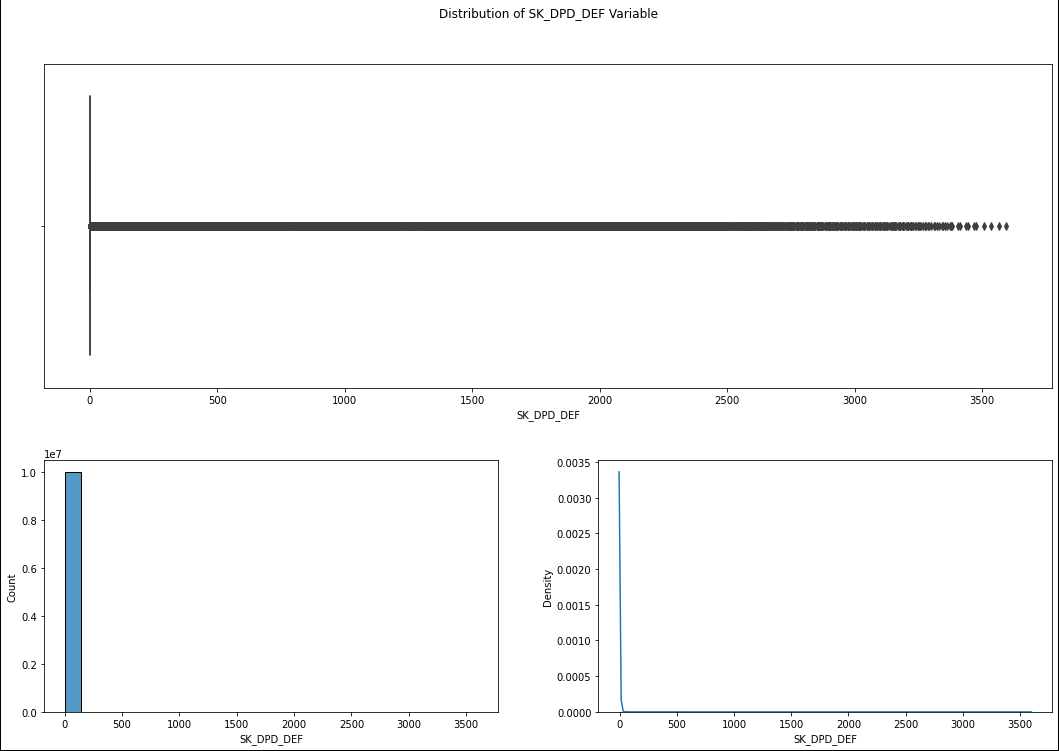

In [22]:
plotter.numeric_distribution(
    title = "Distribution of SK_DPD_DEF Variable",
    data = pos_cash,
    num_col = "SK_DPD_DEF"
)

<h3><div id="3.4">3.4 : Multivariate Analysis</div></h3>

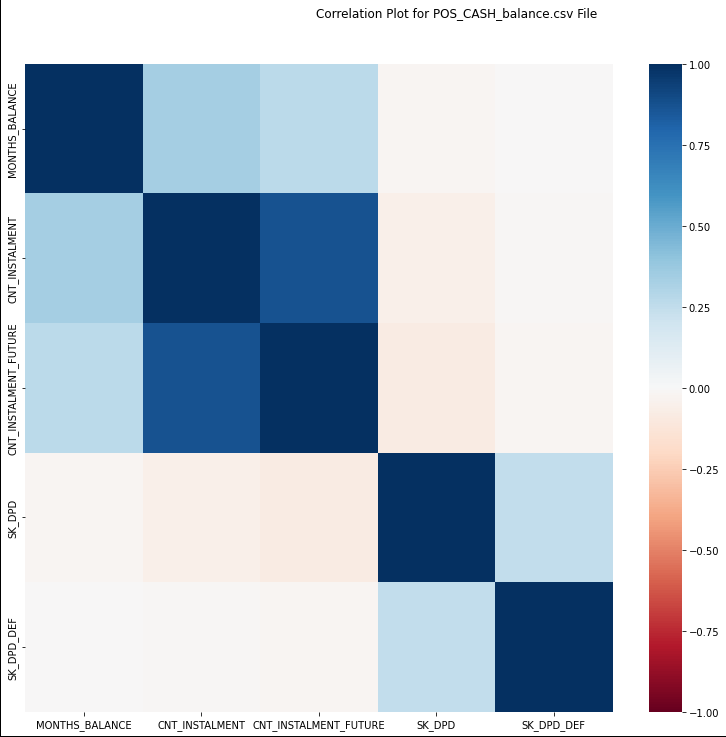

In [23]:
plotter.plot_num_num_corr(
    title = "Correlation Plot for POS_CASH_balance.csv File",
    data = pos_cash.iloc[:, [2,3,4,6,7]]
)

<h2><div id="4">4 : Getting the Resultant Feature Space</div></h2>

In [24]:
pos_fs = pos_fe.is_present(
    data = pos_cash,
    column = "NAME_CONTRACT_STATUS",
    values = ["Signed", "Completed", "Cancelled"]
)
pos_fs.head()

,SK_ID_CURR,FLAG_POS_SIGNED,FLAG_POS_COMPLETED,FLAG_POS_CANCELLED
SK_ID_PREV,,,,
1000001,474813,0,1,0
1000002,509810,0,1,0
1000003,1009828,0,0,0
1000004,2080752,0,1,0
1000005,1941016,0,1,0


<h3><div id="4.1">4.1 : Saving the Feature Space</div></h3>

In [25]:
pos_fs.to_csv(
    os.path.join(ROOT_DIR,"data","generated","pos_cash.csv")
)